<a href="https://colab.research.google.com/github/satabarto123/Project-Iris/blob/main/Project_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


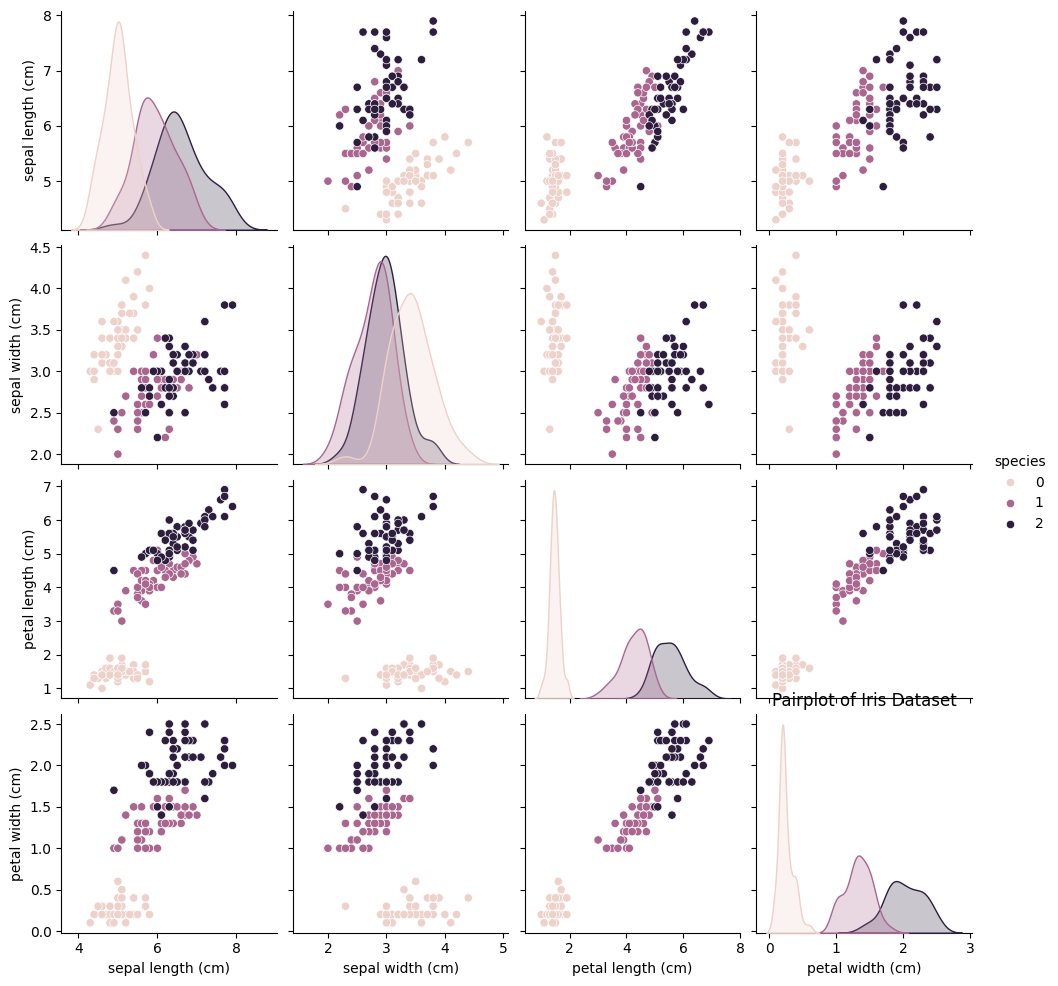

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


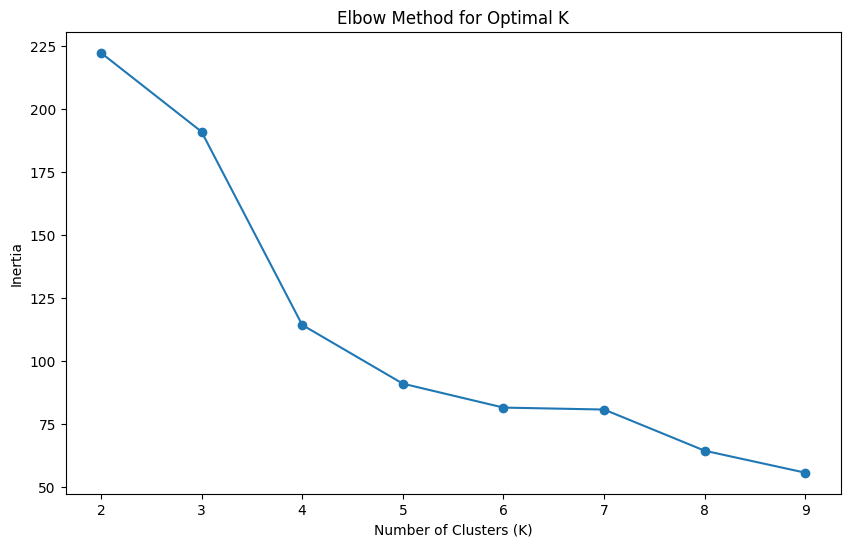

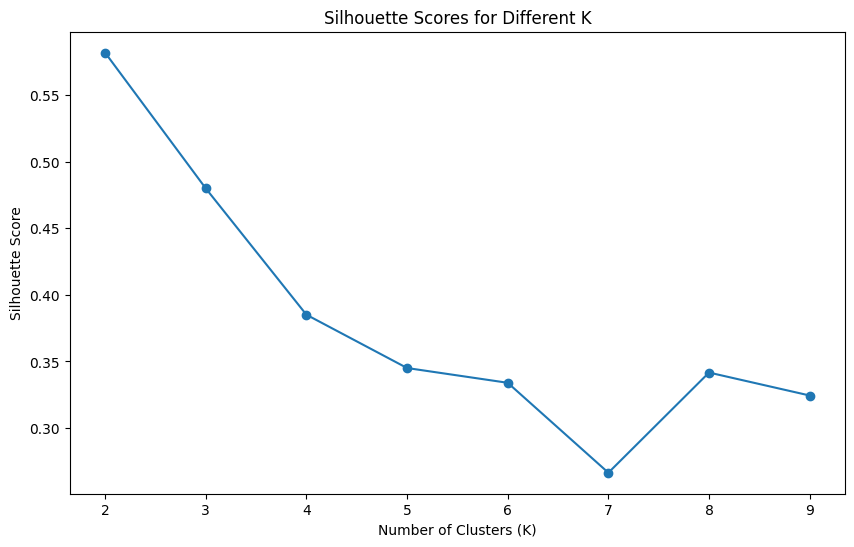

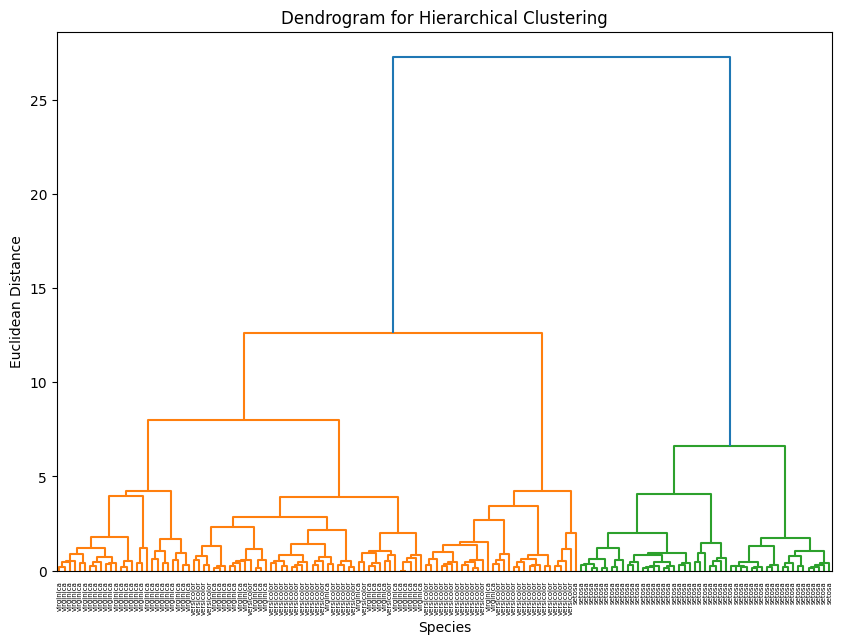

K-Means Clustering Results:
               sepal length (cm)  sepal width (cm)  petal length (cm)  \
kmeans_labels                                                           
0                       6.314583          2.895833           4.973958   
1                       5.169697          3.630303           1.493939   
2                       4.747619          2.895238           1.757143   

               petal width (cm)   species  agg_labels  
kmeans_labels                                          
0                      1.703125  1.520833    0.520833  
1                      0.272727  0.000000    1.000000  
2                      0.352381  0.190476    1.238095  

Hierarchical Clustering Results:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
agg_labels                                                           
0                    6.546479          2.992958           5.267606   
1                    5.016327          3.451020           1.465306   
2           

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

print(data.head())

sns.pairplot(data, hue='species')
plt.title('Pairplot of Iris Dataset')
plt.show()

print(data.isnull().sum())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])

inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_labels'] = kmeans.fit_predict(scaled_data)

agg_clust = AgglomerativeClustering(n_clusters=3)
data['agg_labels'] = agg_clust.fit_predict(scaled_data)

linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target_names[data['species']].astype(str), distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Species')
plt.ylabel('Euclidean Distance')
plt.show()

print("K-Means Clustering Results:")
print(data.groupby('kmeans_labels').mean())

print("\nHierarchical Clustering Results:")
print(data.groupby('agg_labels').mean())

